In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy as sci
from scipy.stats import norm
import itertools
from matplotlib import cm

In [2]:
#Creates empty list for x, y, z, and energy value of hits
xlist = []
ylist = []
zlist = []
elist = []
lastx = []
lasty = []
lastz = []

In [3]:
#Creates function to remove extra spaces in sim file
def cleanlines(line):
    remove = ['  ', ' ']
    for r in remove:
        clean = line.replace(r, '') 
    split = clean.split(';')
    return split

In [4]:
#Starts tallies in detector at 0
counts = 0
data = open('Stripped_Att_Test.sim', 'r')
for l in data:
    line = cleanlines(l.strip('\n'))
    if line[0][2:6] == 'BLAK' and line[1] == '1':  #len(line) >= 1 and
        counts +=1
        elist.append(np.float32(line[14]))
        xlist.append(np.float32(line[4]))
        ylist.append(np.float32(line[5]))
        zlist.append(np.float32(line[6]))
        line2 = cleanlines(next(data).strip('\n'))
        lastx.append(np.float32(line2[4]))
        lasty.append(np.float32(line2[5]))
        lastz.append(np.float32(line2[6]))  
data.close()

In [5]:
print(counts)

391992


In [6]:
#Converting to cylindrical coordinates (r,phi,z)
#Generates phi -180 to 180 degrees
phi = np.arctan2(ylist,xlist)*180/np.pi

In [7]:
Tot = np.array(list(zip(xlist,ylist,zlist,elist,lastx,lasty,lastz,phi)))
print(Tot.shape)

(391992, 8)


In [15]:
Full = max(Tot[:,3])
FullE = Tot[Tot[:,3]==Full] #Creates array of only full energy deposition
print(FullE.shape)

(142479, 8)


In [16]:
#Confirms constant r of 750 cm for all datapoints 
r = np.sqrt(FullE[:,0]**2+FullE[:,1]**2)
print(r)

[749.99994 750.      750.      ... 750.      750.      750.     ]


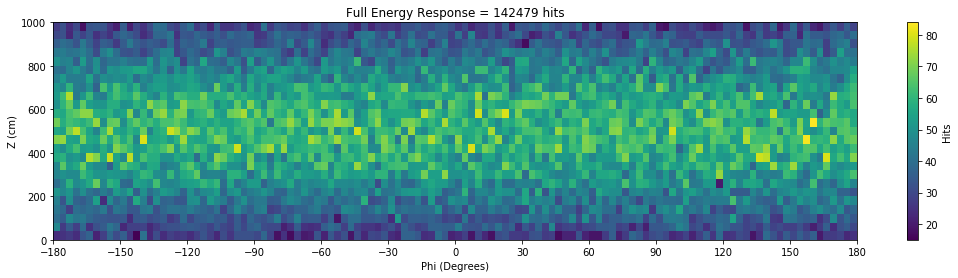

In [18]:
xedges = np.arange(-180.0, 180.1, 3.)
yedges = np.arange(0., 1000.1, 40.)
heatmap2, _, __ = np.histogram2d(FullE[:,7],FullE[:,2], bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(18,4))
im1 = plt.imshow(heatmap2.T, extent=extent, aspect='auto', origin='lower')
plt.xticks(np.arange(-180., 181., 30.))
#plt.ylim(480, 520)
cb = plt.colorbar(im1)
cb.set_label('Hits')
plt.title('Full Energy Response = ' + str(len(FullE)) +' hits')
plt.xlabel('Phi (Degrees)')
plt.ylabel('Z (cm)')
#plt.savefig('images/1Total_.png')
plt.show()

In [19]:
flip2 = np.transpose(heatmap2)

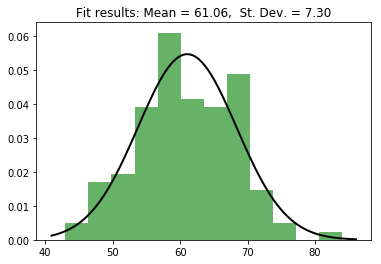

In [20]:
# Fit a normal distribution to the data:
mu, std = norm.fit(flip2[13])
# Plot the histogram.
plt.hist(flip2[13], bins=12, density=True, alpha=0.6, color='g')
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: Mean = %.2f,  St. Dev. = %.2f" % (mu, std)
plt.title(title)
plt.show()

In [21]:
A = 1000000 #Activity 1 mil particles
R = 750 # Distance to detector cm
h = 40 # Height of detector cm
Area = 2*np.pi*R*h/120 # Area of detector cm^2
L = 10 #Attenuation length cm
Att = 0.05621 #Attenuation coeff. cm^2/g
Den = 2.3 #Density g/cm^3
CR = (A*Area/(4*np.pi*R**2))*(np.e**(-Den*Att*L)) #counts
print(CR)

60.99841512057489
